<a href="https://colab.research.google.com/github/vipingupta1907/2011MT22_CS575/blob/main/Assignment4/J%26J_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4 J&J dataset solution by 2011MT22_Vipin

#J&J Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,kpss
import warnings 
warnings.simplefilter('ignore')

In [2]:
!pip install statsmodels==0.12.2 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/cs575ts/Assignments/main/Assignment_4/jj.csv")
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


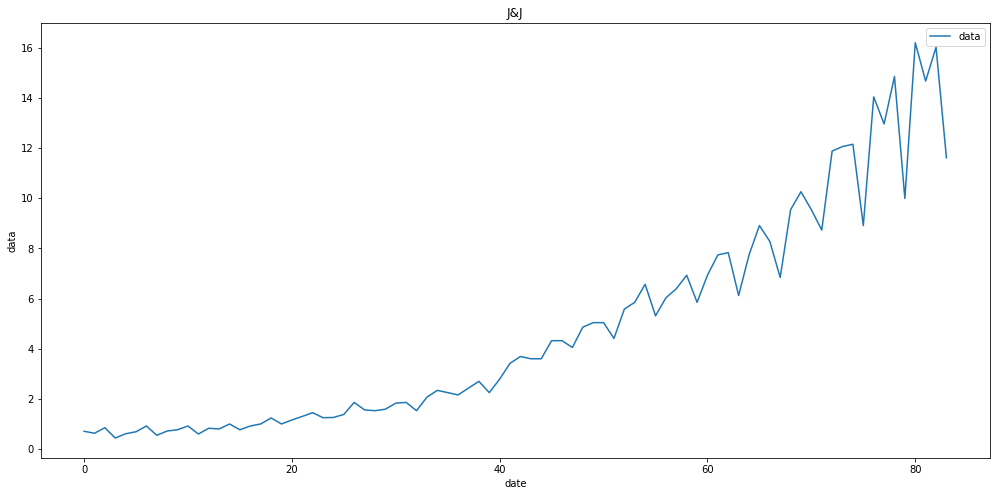

In [4]:
MEP = df.plot(figsize=(17, 8))
plt.title('J&J')
MEP.set_ylabel('data')
MEP.set_xlabel('date')

plt.show()

#a.) Test for Stationary

In [5]:
#define function for ADF test
def adf_test(atr):
    timeseries = df[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

adf_test('data')    

Results of Dickey-Fuller Test for  data 

Test Statistic                  2.742017
p-value                         1.000000
#Lags Used                     11.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


> P value is greater than 0.05 so its non stationary dataset



In [6]:
#define function for kpss test
def kpss_test(atr):
    timeseries = df[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

kpss_test('data')

Results of KPSS Test for  data
Test Statistic            0.706778
p-value                   0.012929
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


> p value is less thn 0.05 so its non stationary dataset

As From ADF and KPSS test, given dataset is non stationary time series

#b.) evidence of seasonality and non stationary by graph

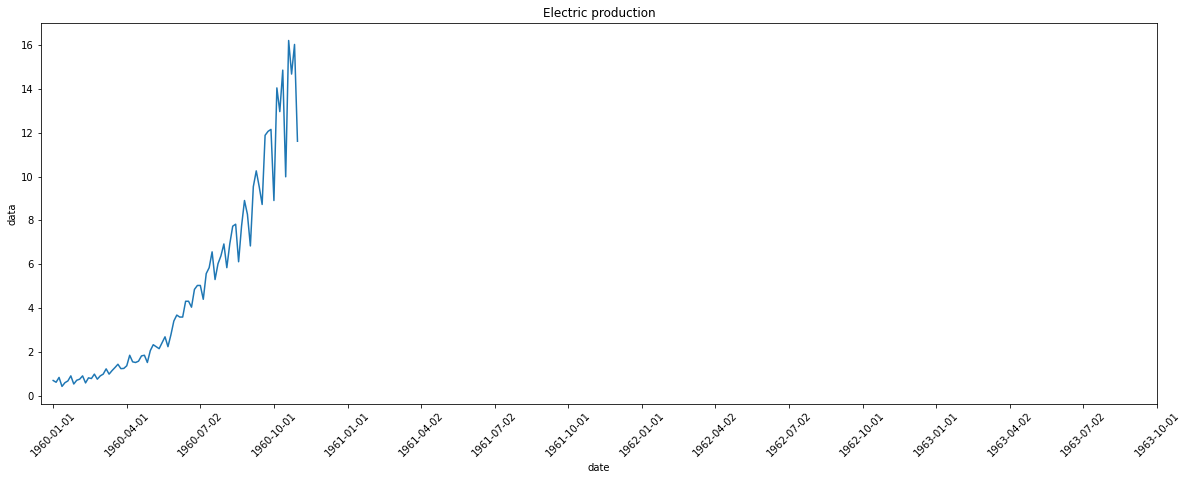

In [7]:
plt.figure(figsize=(20, 7))
plt.plot(df['data'])
plt.xticks([i for i in range(0,396,25)],df.date, rotation=45)
plt.xlabel("date")
plt.ylabel("data")
plt.title('Electric production')
plt.show()

In [8]:
df['meanRoll'] = df['data'].rolling(5).mean()
df['stdRoll'] = df['data'].rolling(5).std()
df.head(15)

,date,data,meanRoll,stdRoll
0,1960-01-01,0.71,NaN,NaN
1,1960-04-01,0.63,NaN,NaN
2,1960-07-02,0.85,NaN,NaN
3,1960-10-01,0.44,NaN,NaN
4,1961-01-01,0.61,0.648,0.149733
5,1961-04-02,0.69,0.644,0.147919
6,1961-07-02,0.92,0.702,0.191494
7,1961-10-01,0.55,0.642,0.180194
8,1962-01-01,0.72,0.698,0.140961
9,1962-04-02,0.77,0.730,0.133978


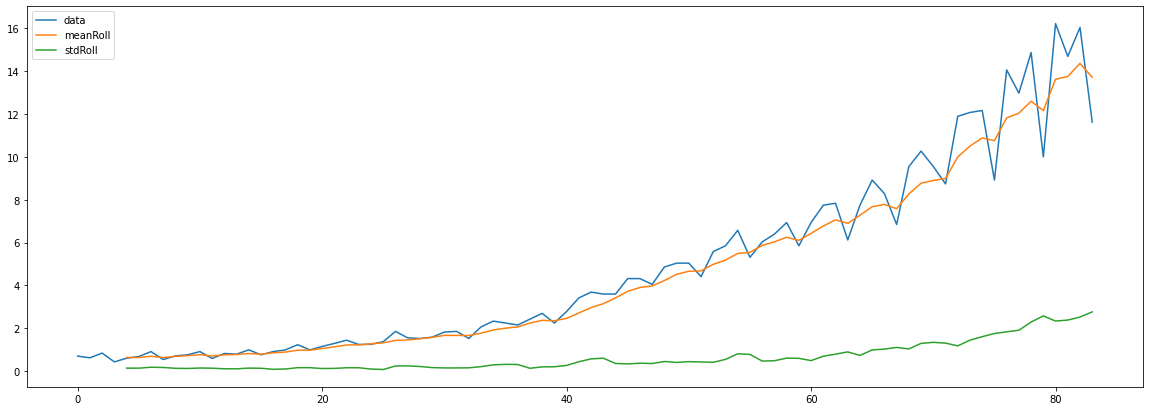

In [9]:
df.plot(figsize=[20,7])
df.drop(df.columns[-2:],axis=1,inplace=True)

from the avove two graphs, it can be seen that this dataset is having a seasonality and dataset is nonstationary. we need to bring this Non stationary dataset into stationary by doing different differencing. 

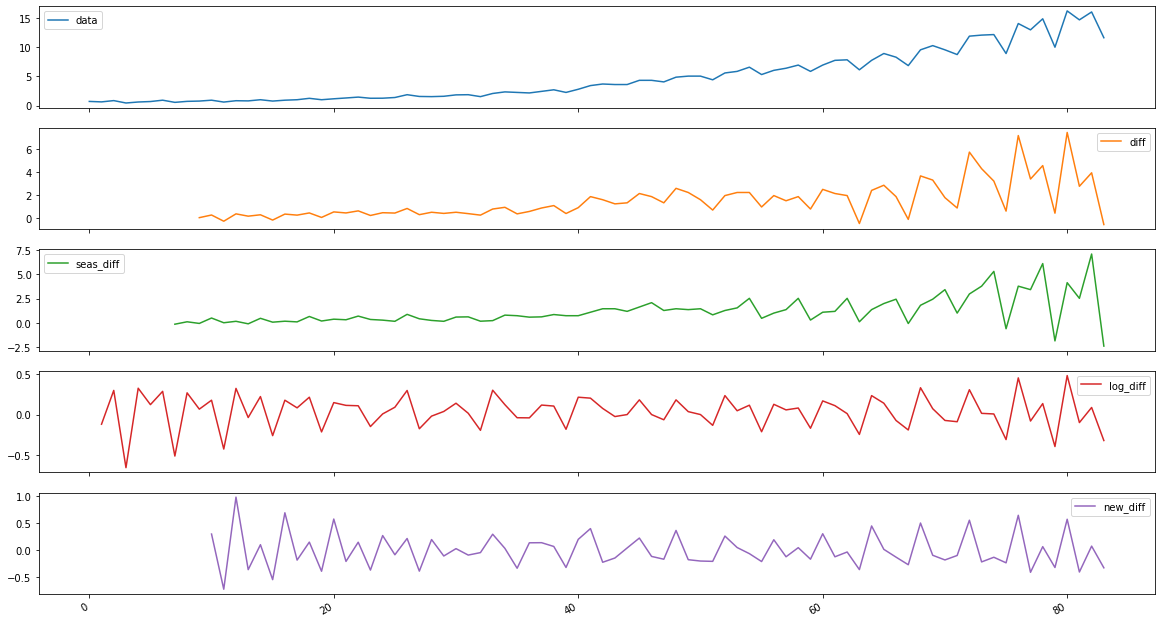

In [10]:
# Differencing
df['diff'] = df['data'].diff(periods=9)

# Seasonal Differencing
df['seas_diff'] = df['data'].diff(periods=7)

# Transformation (here we use log transformation)
df_log = np.log(df['data'])
df['log_diff'] = df_log.diff(periods=1)

df['new_diff'] = df['log_diff'].diff(periods=9)

df.plot(subplots=True, figsize=(20,12))
plt.show()

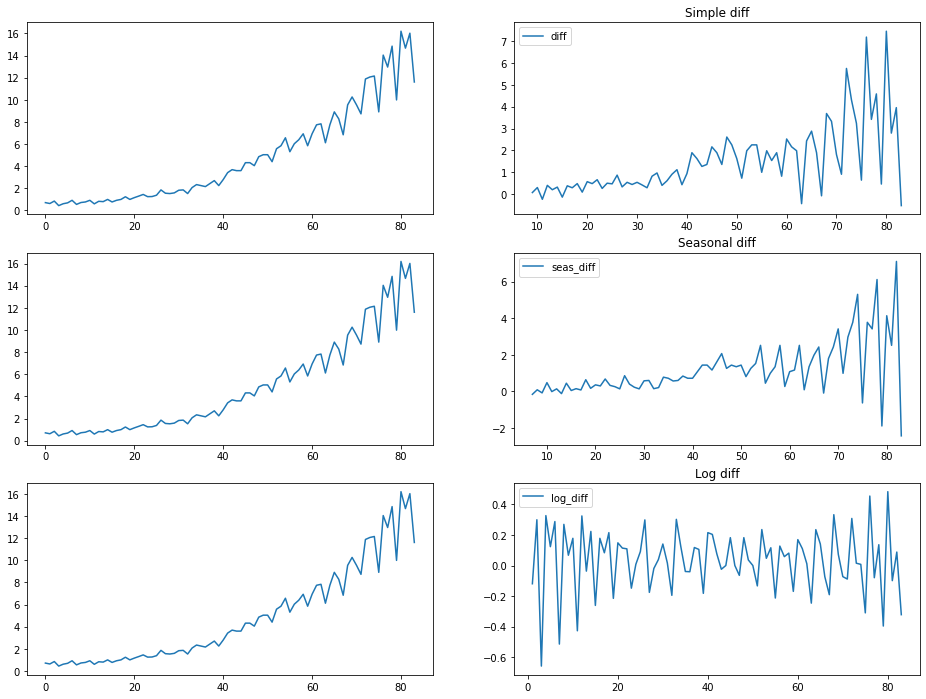

In [11]:
# visualize
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
df['data'].plot()
plt.subplot(3,2,2)
df['diff'].plot()
plt.title('Simple diff')
plt.legend()

plt.subplot(3,2,3)
df['data'].plot()
plt.subplot(3,2,4)
df['seas_diff'].plot()
plt.title('Seasonal diff')
plt.legend()

plt.subplot(3,2,5)
df['data'].plot()
plt.subplot(3,2,6)
df['log_diff'].plot()
plt.title('Log diff')
plt.legend()


plt.show()

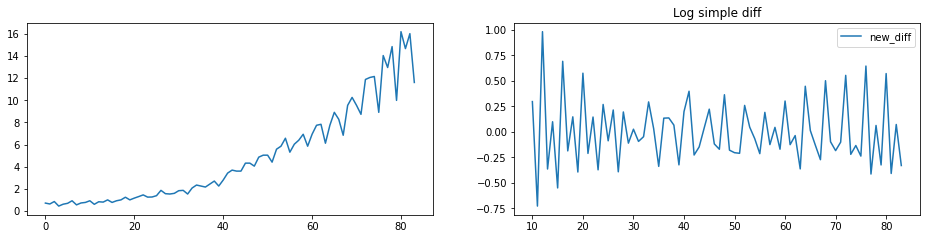

In [12]:
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
df['data'].plot()
plt.subplot(3,2,2)
df['new_diff'].plot()
plt.title('Log simple diff')
plt.legend()
plt.show()

In [13]:
adf_test('diff')

print("\n")

kpss_test('diff')

Results of Dickey-Fuller Test for  diff 

Test Statistic                  0.830352
p-value                         0.992111
#Lags Used                     12.000000
Number of Observations Used    62.000000
Critical Value (1%)            -3.540523
Critical Value (5%)            -2.909427
Critical Value (10%)           -2.592314
dtype: float64


Results of KPSS Test for  diff
Test Statistic            0.615118
p-value                   0.021262
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [14]:
adf_test('seas_diff')

print("\n")

kpss_test('seas_diff')

Results of Dickey-Fuller Test for  seas_diff 

Test Statistic                  0.147233
p-value                         0.969142
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


Results of KPSS Test for  seas_diff
Test Statistic            0.624570
p-value                   0.020403
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [15]:
adf_test('log_diff')

print("\n")

kpss_test('log_diff')

Results of Dickey-Fuller Test for  log_diff 

Test Statistic                 -4.317044
p-value                         0.000415
#Lags Used                      5.000000
Number of Observations Used    77.000000
Critical Value (1%)            -3.518281
Critical Value (5%)            -2.899878
Critical Value (10%)           -2.587223
dtype: float64


Results of KPSS Test for  log_diff
Test Statistic            0.130997
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [16]:
adf_test('new_diff')

print("\n")

kpss_test('new_diff')

Results of Dickey-Fuller Test for  new_diff 

Test Statistic                 -3.784264
p-value                         0.003072
#Lags Used                     11.000000
Number of Observations Used    62.000000
Critical Value (1%)            -3.540523
Critical Value (5%)            -2.909427
Critical Value (10%)           -2.592314
dtype: float64


Results of KPSS Test for  new_diff
Test Statistic            0.204728
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


So from the above its clear that log differencing is giving a better stationarity time series

#c.) ACF and PACF plot

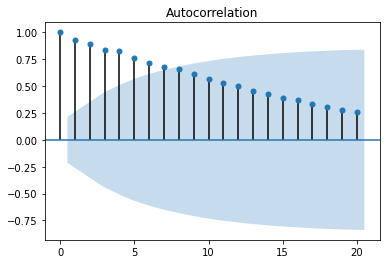

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['data'])
plt.show()

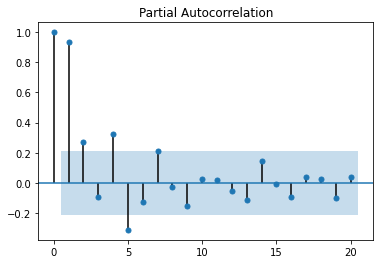

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['data'])
plt.show()

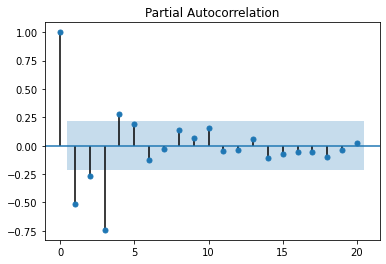

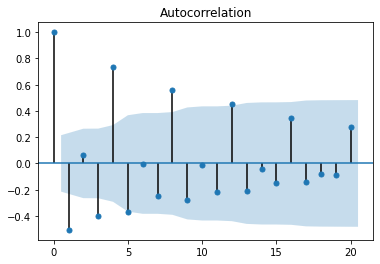

In [39]:
plot_pacf(df.log_diff.dropna());
plot_acf(df.log_diff.dropna());

# AR model

In [20]:
# Defining mean function 
def mean_func(arr):
  sum=0
  for i in arr:
    sum = sum +i
  mean = sum/len(arr)
  return mean

# Defining my own function for NSE
def NSE(e,s):
  diff = []
  num_sum = 0
  denom_sum = 0
  for i,j in zip(e, s):
    diff.append(i-j)
  for i in diff:
    num_sum = num_sum + i**2
  for k in e:
    denom_sum = denom_sum + (k-(mean_func(e)))**2
  nse = 1-(num_sum/denom_sum) 
  return nse   

In [21]:
# Defining my function for R-Squared
def rsquared(e,s):
  mean_e = mean_func(e)
  mean_s = mean_func(s)
  num_sum = 0
  for i,j in zip(e,s): 
    num_sum = num_sum + (i - mean_e)*(j - mean_s)
  denom_sum1 = 0
  for p in e: 
    denom_sum1 = (denom_sum1 + (p - mean_e)**2)
  denom_sum2 = 0
  for q in s: 
    denom_sum2 = (denom_sum2 + (q - mean_s)**2)
  denom1 = (denom_sum1)**0.5
  denom2 = (denom_sum2)**0.5
  r_squared = (num_sum/(denom1*denom2))**2
  return r_squared

In [22]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from math import sqrt

RMSE of different interval for AR model is :  0.276522840886315
RSquared of different interval for AR model is :  0.5112272361567441
NSE of different interval for AR model is :  0.28725896797723527


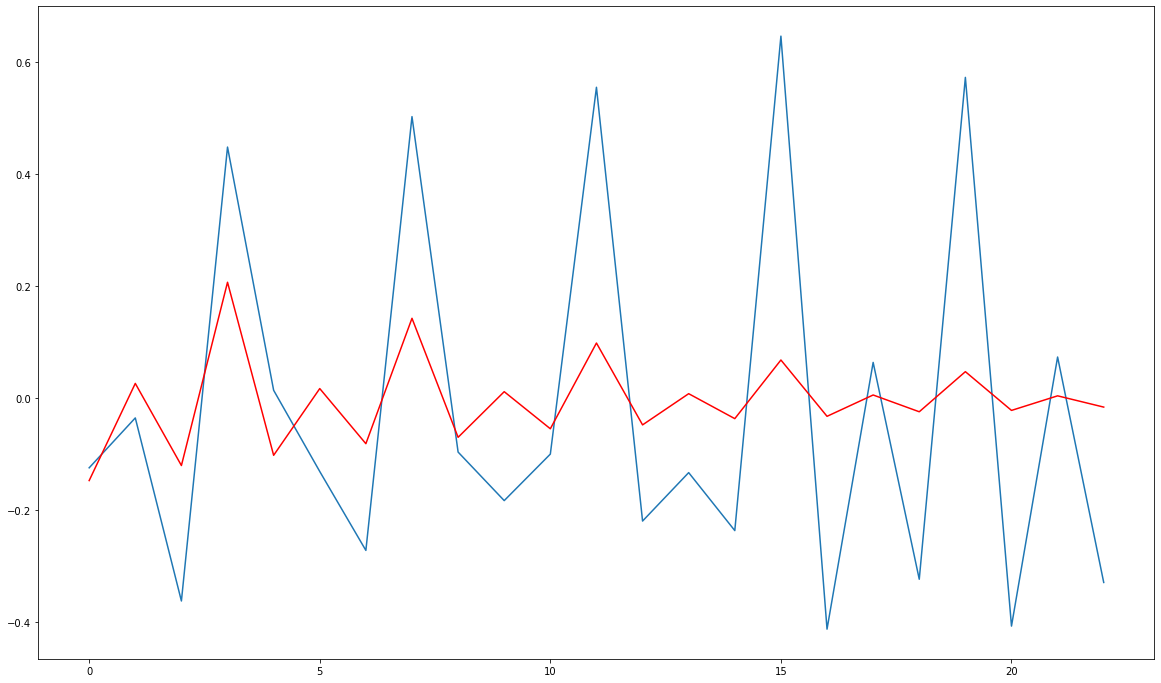

RMSE of different interval for AR model is :  0.36348431210747395
RSquared of different interval for AR model is :  0.6050558384166659
NSE of different interval for AR model is :  -0.4709098480203022


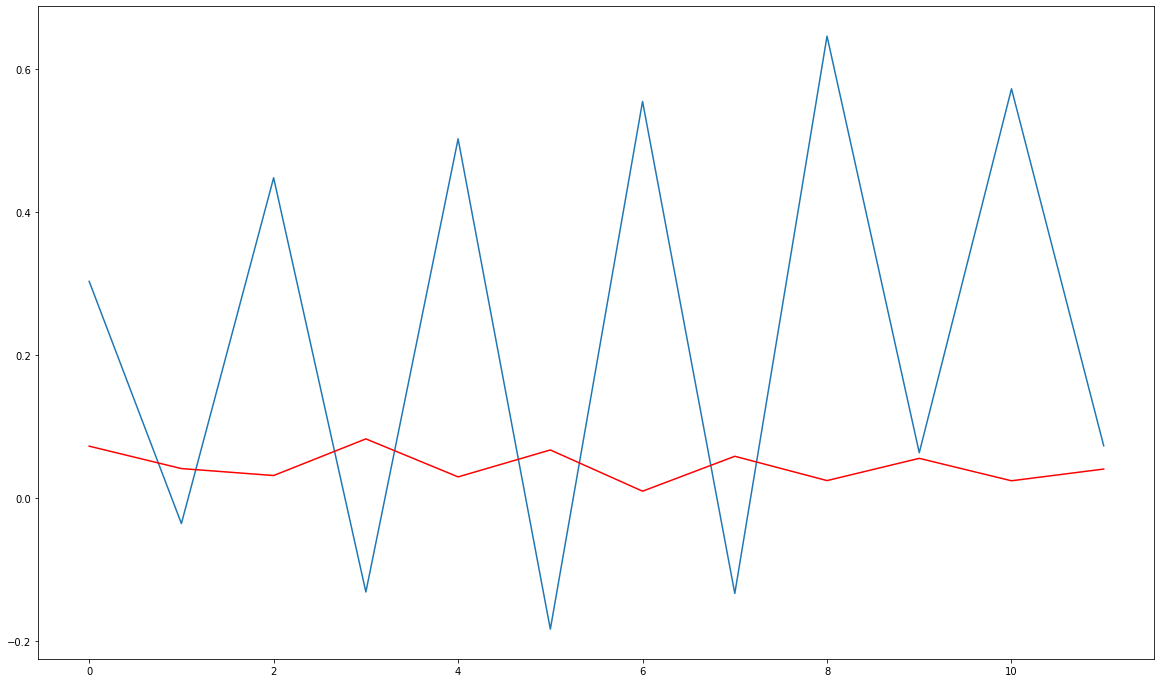

RMSE of different interval for AR model is :  0.3017388163783649
RSquared of different interval for AR model is :  0.5441164963060212
NSE of different interval for AR model is :  0.18975568418020883


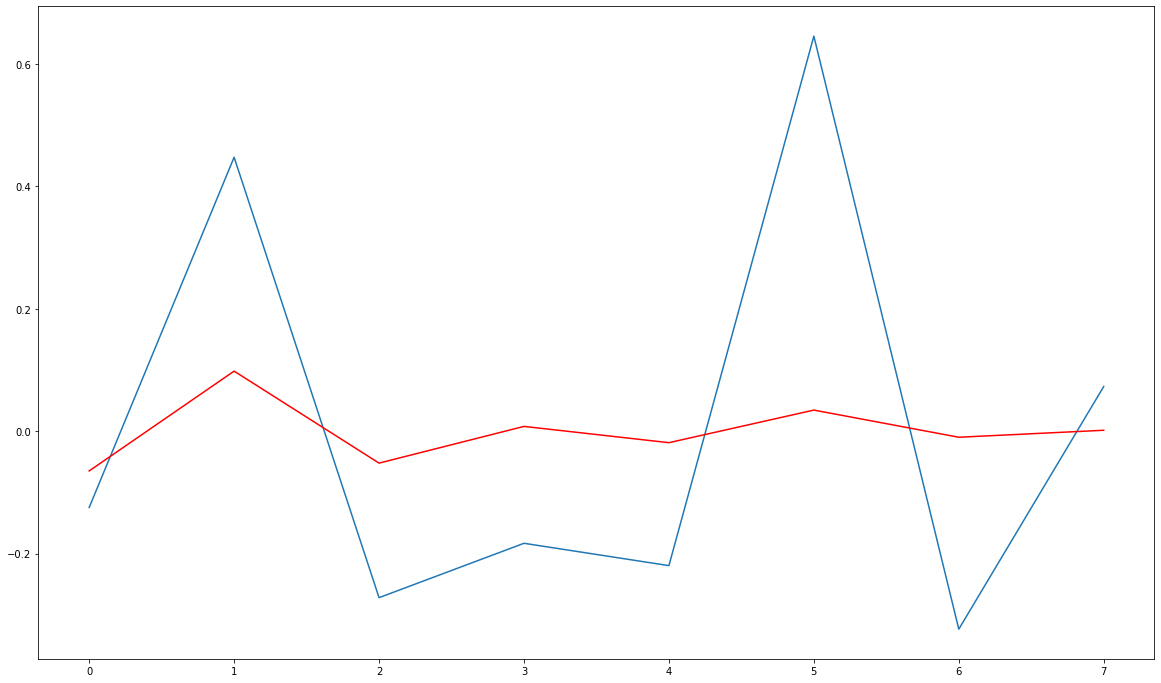

RMSE of different interval for AR model is :  0.4381640990796859
RSquared of different interval for AR model is :  0.6392971230515839
NSE of different interval for AR model is :  -18.47780109424198


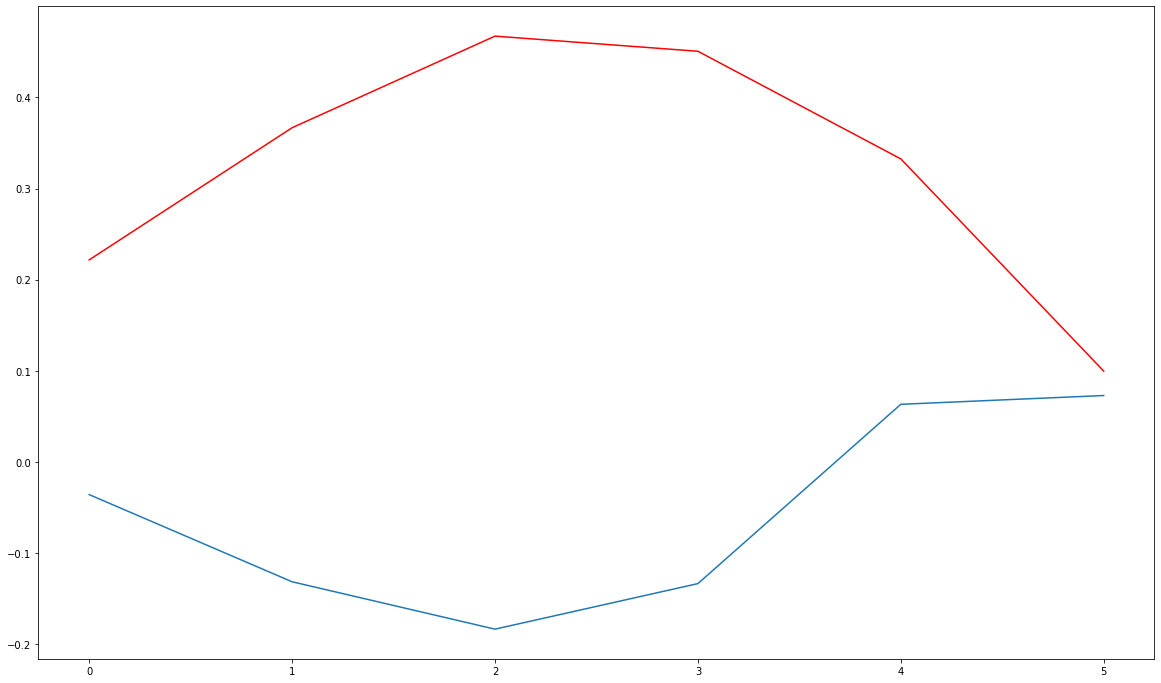

In [23]:
data1 = df['new_diff'].dropna().to_numpy()
ds1 = [data1[0::1],data1[0::2],data1[0::3],data1[0::4]]
for i in ds1:
  n = int(len(i)*0.7)
  train, test = i[:n], i[n:]
  # fit model
  model = AutoReg(train, lags=5)
  model_fit = model.fit()

# make prediction
  yhat = model_fit.predict(len(train), len(train)+len(test)-1)
  rmse = sqrt(mean_squared_error(test, yhat))
  r_squared = rsquared(test,yhat)
  n_s_e = NSE(test,yhat)
  print("RMSE of different interval for AR model is : ",rmse)
  print("RSquared of different interval for AR model is : ",r_squared)
  print("NSE of different interval for AR model is : ",n_s_e)
  plt.figure(figsize=(20,12))
  plt.plot(test)
  plt.plot(yhat, color='red')
  plt.show()

In [24]:
data = df['log_diff'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]

# fit model
model = AutoReg(train, lags=15)
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
r_squared = rsquared(test,yhat)
n_s_e = NSE(test,yhat)

print("RMSE for AR model is : ",rmse)
print("RSquared for AR model is : ",r_squared)
print("NSE for AR model is : ",n_s_e)

RMSE for AR model is :  0.20188383745985916
RSquared for AR model is :  0.3628481046237246
NSE for AR model is :  0.2168398400140673


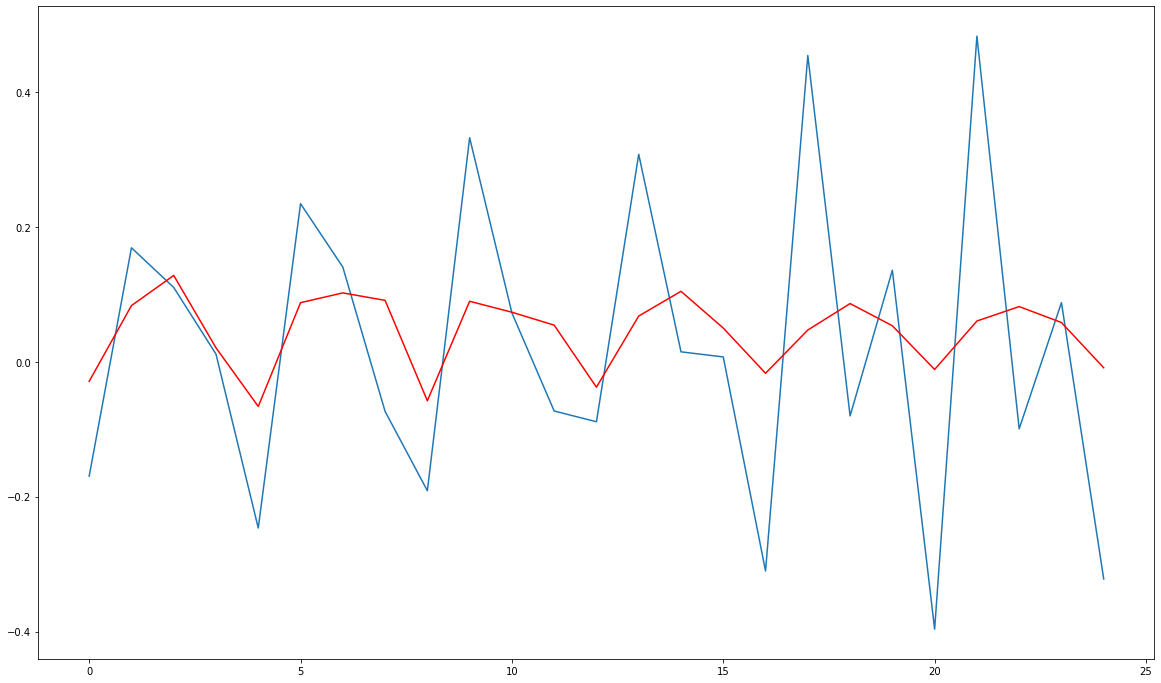

In [25]:
# plot results
plt.figure(figsize=(20,12))
plt.plot(test)
plt.plot(yhat, color='red')
plt.show()

# MA model

RMSE of different interval for MA model is :  0.40065106257964467
RSquared of different interval for MA model is :  0.1048488616734765
NSE of different interval for MA model is :  -0.49624371557267777


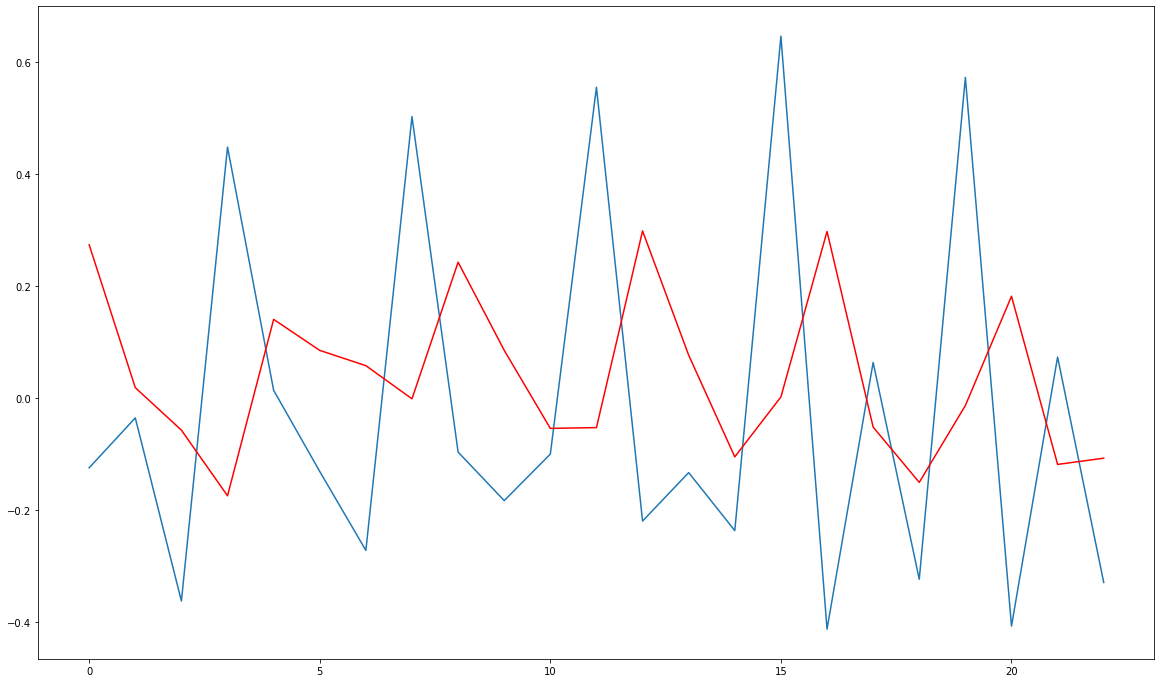

RMSE of different interval for MA model is :  0.4023130780290789
RSquared of different interval for MA model is :  0.017373658897492168
NSE of different interval for MA model is :  -0.8019511506373644


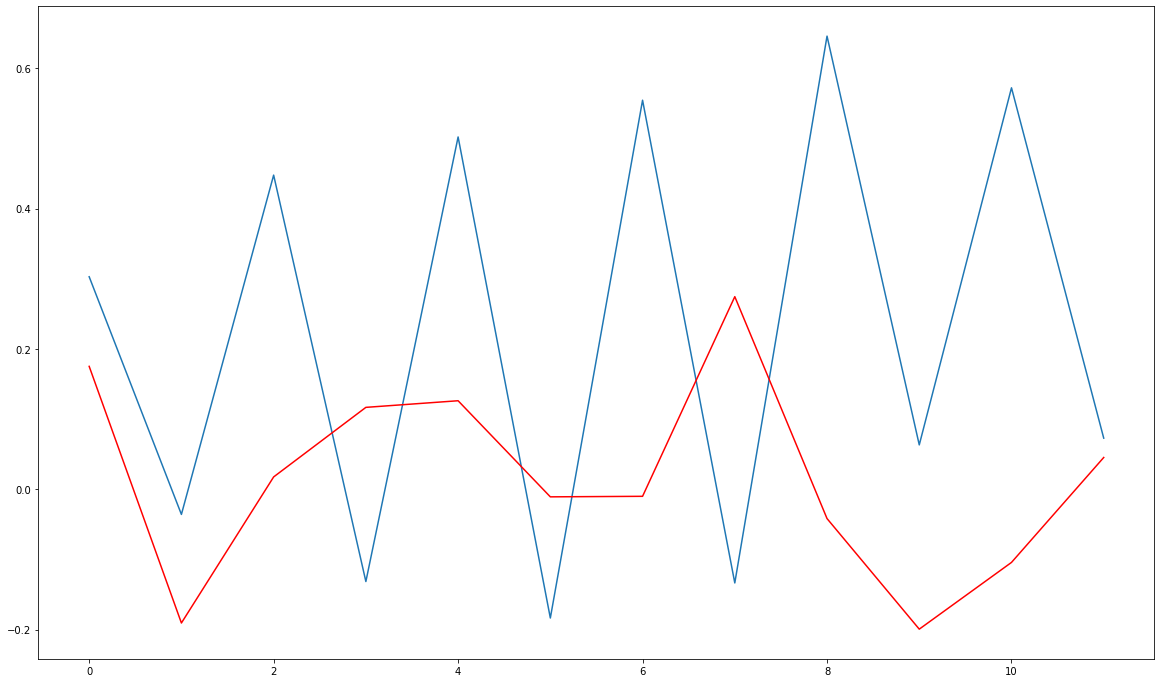

RMSE of different interval for MA model is :  0.4355937537740694
RSquared of different interval for MA model is :  0.3191276099677772
NSE of different interval for MA model is :  -0.6885616254961724


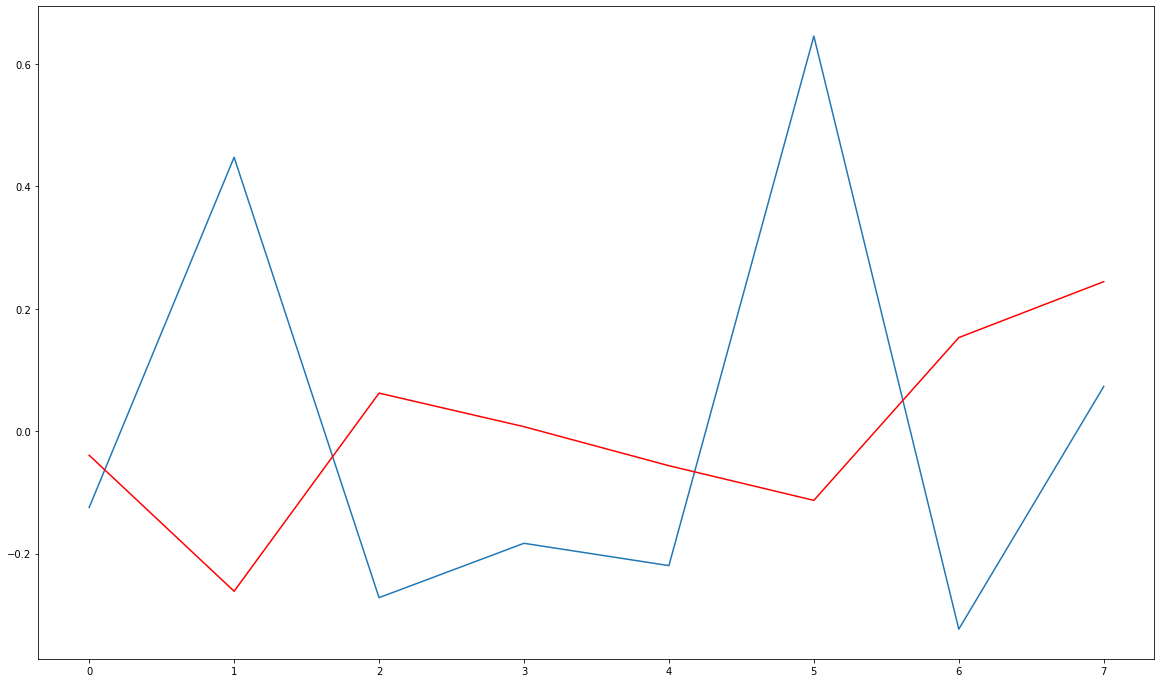

RMSE of different interval for MA model is :  0.22590971076972166
RSquared of different interval for MA model is :  0.33986476780764974
NSE of different interval for MA model is :  -4.177691184024563


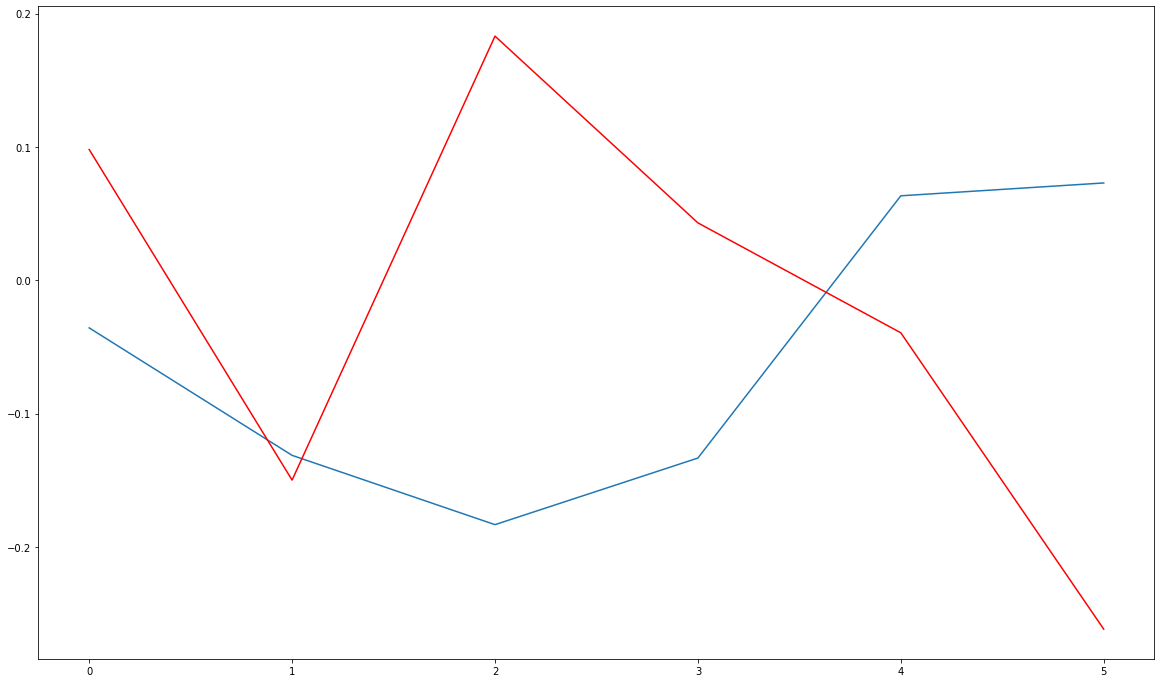

In [26]:
data1 = df['new_diff'].dropna().to_numpy()
ds1 = [data1[0::1],data1[0::2],data1[0::3],data1[0::4]]
for i in ds1:
  n = int(len(i)*0.7)
  train, test = i[:n], i[n:]
  # fit model
  model = ARIMA(data, order=(0, 0, 3))
  model_fit = model.fit()

# make prediction
  yhat = model_fit.predict(len(train), len(train)+len(test)-1)
  rmse = sqrt(mean_squared_error(test, yhat))
  r_squared = rsquared(test,yhat)
  n_s_e = NSE(test,yhat)
  print("RMSE of different interval for MA model is : ",rmse)
  print("RSquared of different interval for MA model is : ",r_squared)
  print("NSE of different interval for MA model is : ",n_s_e)
  plt.figure(figsize=(20,12))
  plt.plot(test)
  plt.plot(yhat, color='red')
  plt.show()

In [27]:
data = df['log_diff'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]

# fit model
model = ARIMA(data, order=(0, 0, 3))
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
r_squared = rsquared(test,yhat)
n_s_e = NSE(test,yhat)

print("RMSE for MA model is : ",rmse)
print("RSquared for MA model is : ",r_squared)
print("NSE for MA model is : ",n_s_e)

RMSE for MA model is :  0.13470964582729686
RSquared for MA model is :  0.6675007644025324
NSE for MA model is :  0.6513056805256779


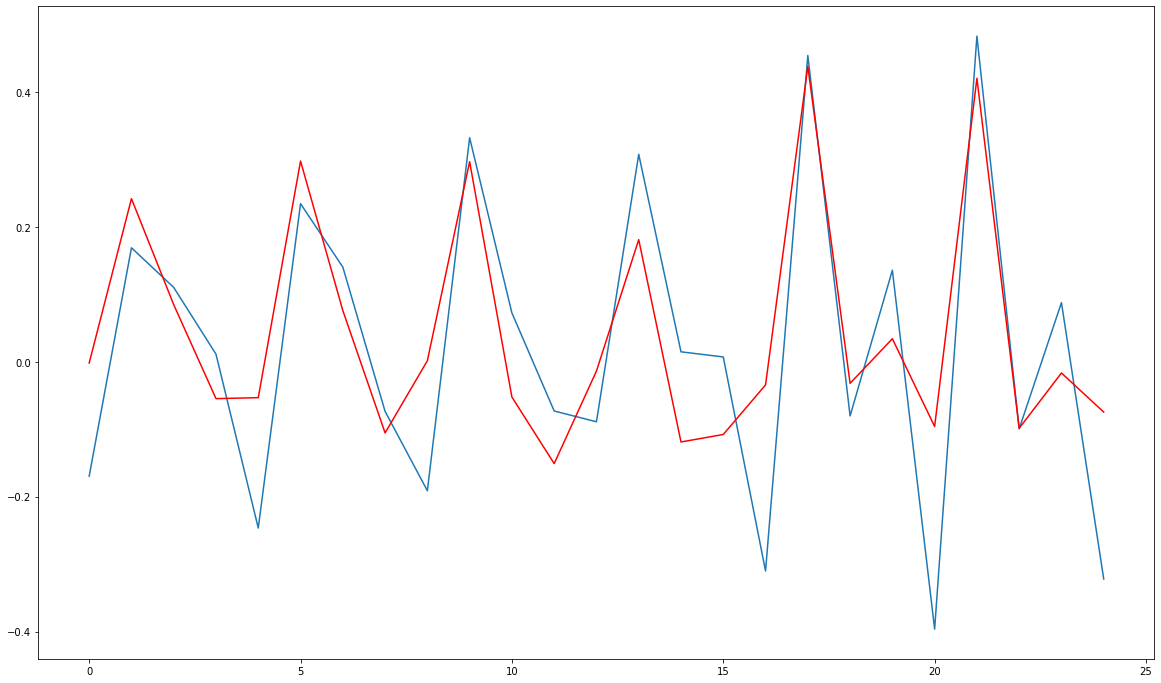

In [28]:
# plot results
plt.figure(figsize=(20,12))
plt.plot(test)
plt.plot(yhat, color='red')
plt.show()

# ARMA model

RMSE of different interval for ARMA model is :  0.4394380988015667
RSquared of different interval for ARMA model is :  0.5034324667665427
NSE of different interval for ARMA model is :  -0.7999695395182755


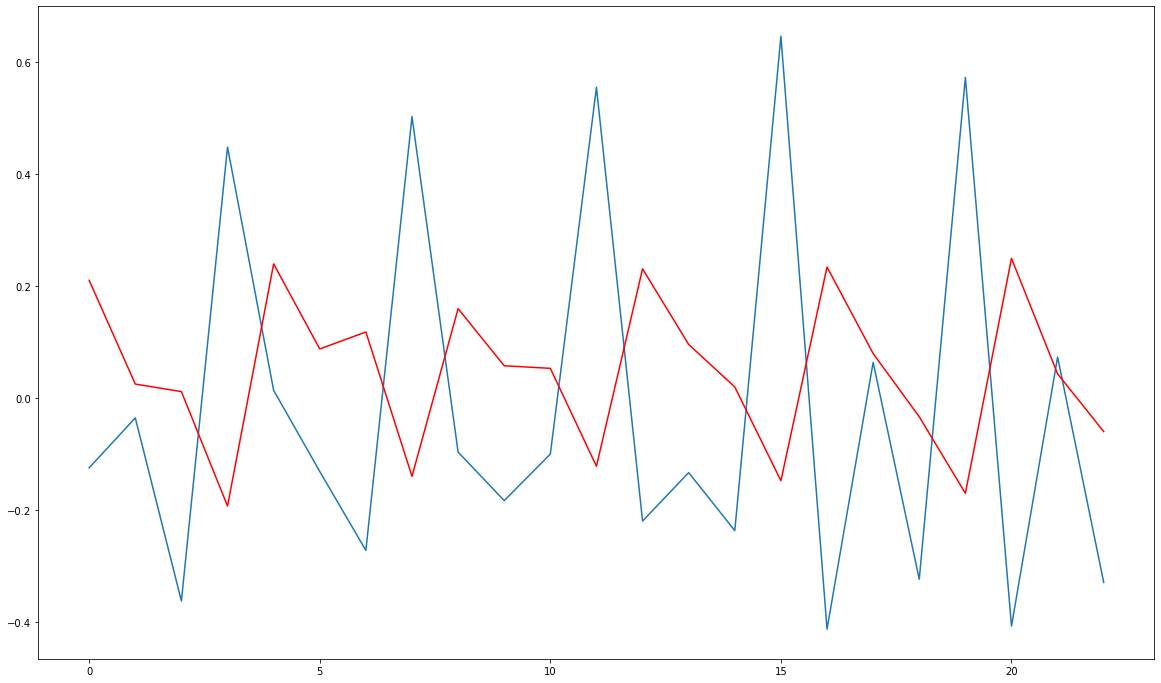

RMSE of different interval for ARMA model is :  0.3879528698417292
RSquared of different interval for ARMA model is :  0.00019110270809829613
NSE of different interval for ARMA model is :  -0.6756088684508066


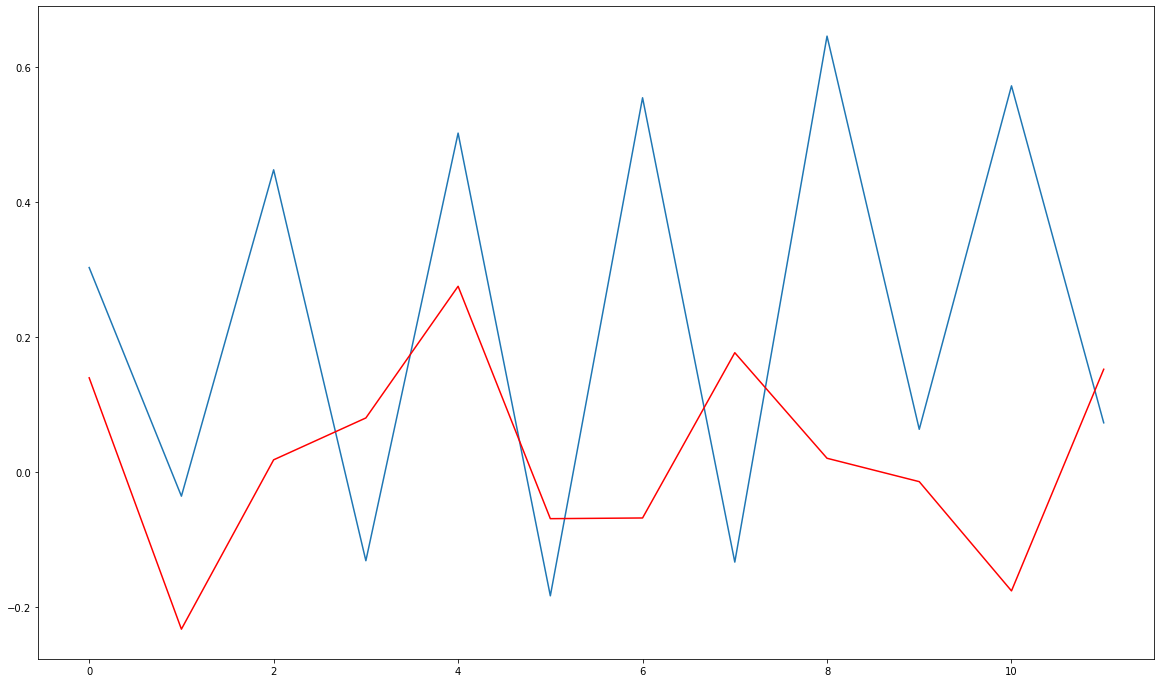

RMSE of different interval for ARMA model is :  0.4766534142564335
RSquared of different interval for ARMA model is :  0.7040907812745182
NSE of different interval for ARMA model is :  -1.0218970776741836


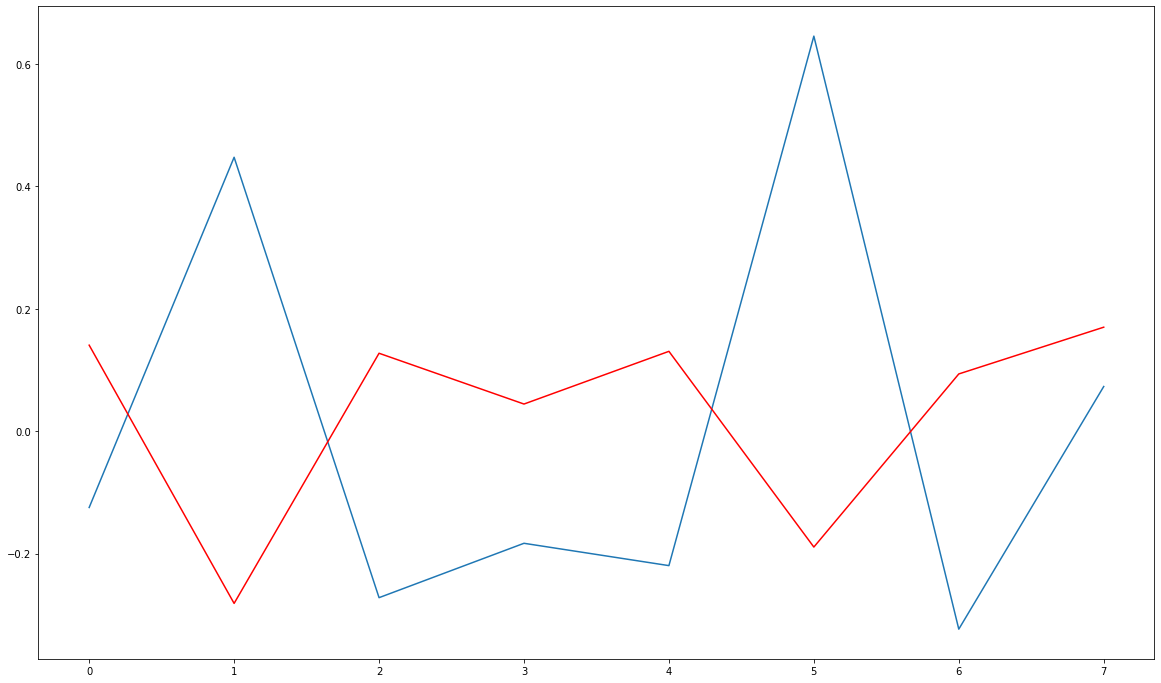

RMSE of different interval for ARMA model is :  0.2882449958630789
RSquared of different interval for ARMA model is :  0.016362734072597692
NSE of different interval for ARMA model is :  -7.429268691752103


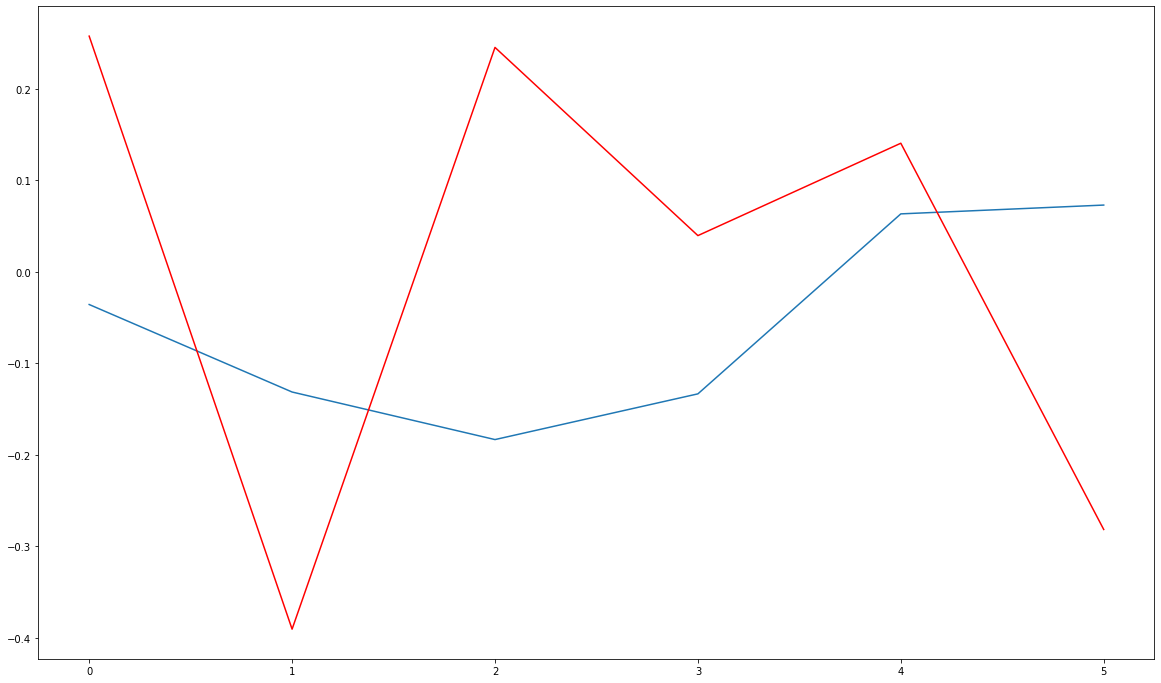

In [29]:
data1 = df['new_diff'].dropna().to_numpy()
ds1 = [data1[0::1],data1[0::2],data1[0::3],data1[0::4]]
for i in ds1:
  n = int(len(i)*0.7)
  train, test = i[:n], i[n:]
  # fit model
  model = ARIMA(data, order=(3, 0, 3))
  model_fit = model.fit()

# make prediction
  yhat = model_fit.predict(len(train), len(train)+len(test)-1)
  rmse = sqrt(mean_squared_error(test, yhat))
  r_squared = rsquared(test,yhat)
  n_s_e = NSE(test,yhat)
  print("RMSE of different interval for ARMA model is : ",rmse)
  print("RSquared of different interval for ARMA model is : ",r_squared)
  print("NSE of different interval for ARMA model is : ",n_s_e)
  plt.figure(figsize=(20,12))
  plt.plot(test)
  plt.plot(yhat, color='red')
  plt.show()

In [30]:
data = df['log_diff'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]

# fit model
model = ARIMA(data, order=(3, 0, 3))
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
r_squared = rsquared(test,yhat)
n_s_e = NSE(test,yhat)

print("RMSE for ARMA model is : ",rmse)
print("RSquared for ARMA model is : ",r_squared)
print("NSE for ARMA model is : ",n_s_e)

RMSE for ARMA model is :  0.06345049056458302
RSquared for ARMA model is :  0.9349281793044396
NSE for ARMA model is :  0.9226398234645226


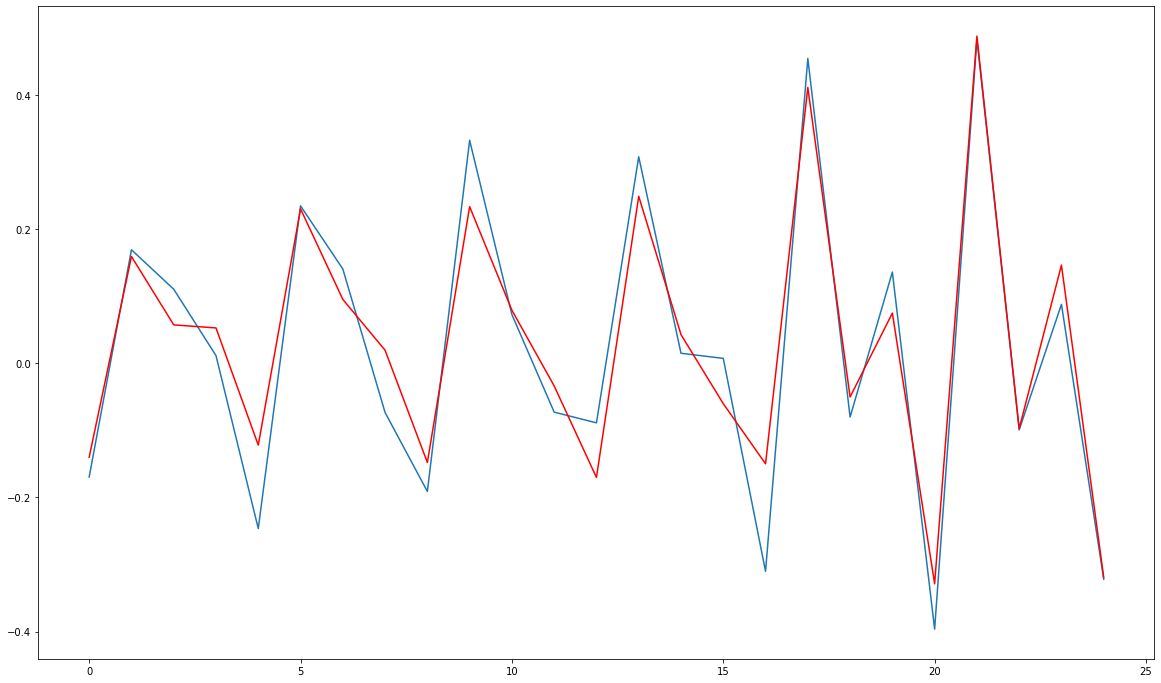

In [31]:
# plot results
plt.figure(figsize=(20,12))
plt.plot(test)
plt.plot(yhat, color='red')
plt.show()

# ARIMA model

RMSE of different interval for ARIMA model is :  0.44121342934537156
RSquared of different interval for ARIMA model is :  0.4872811973563773
NSE of different interval for ARIMA model is :  -0.8145426769182855


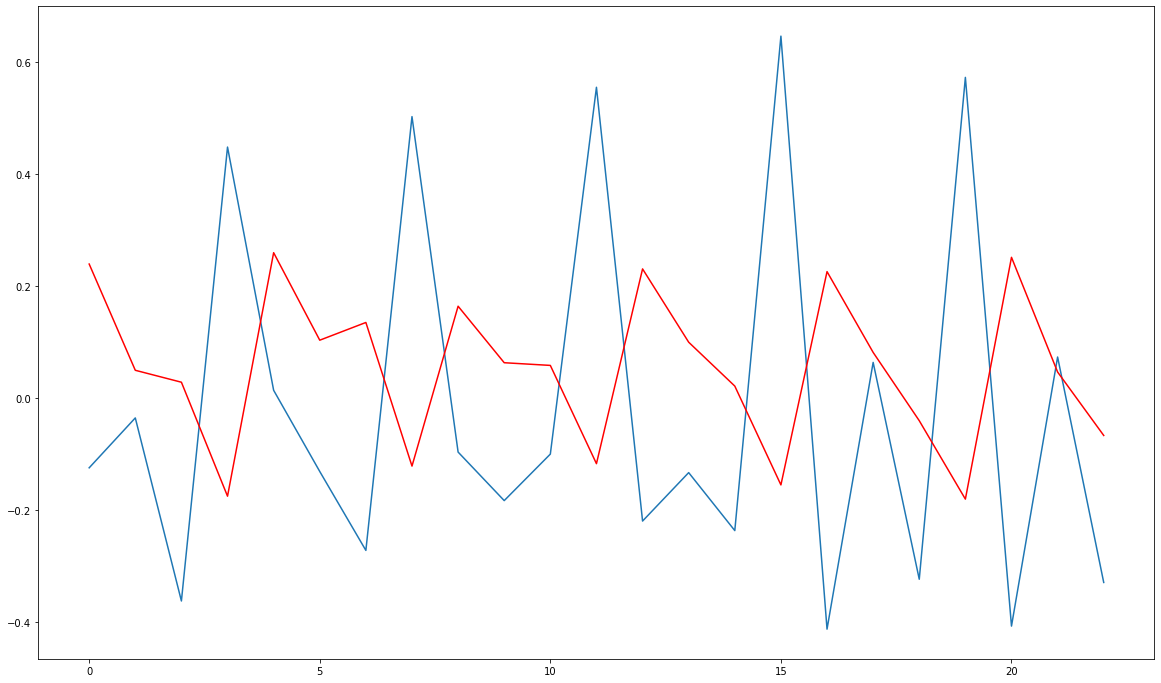

RMSE of different interval for ARIMA model is :  0.39153239057197636
RSquared of different interval for ARIMA model is :  0.0008448992043959169
NSE of different interval for ARIMA model is :  -0.7066721620731435


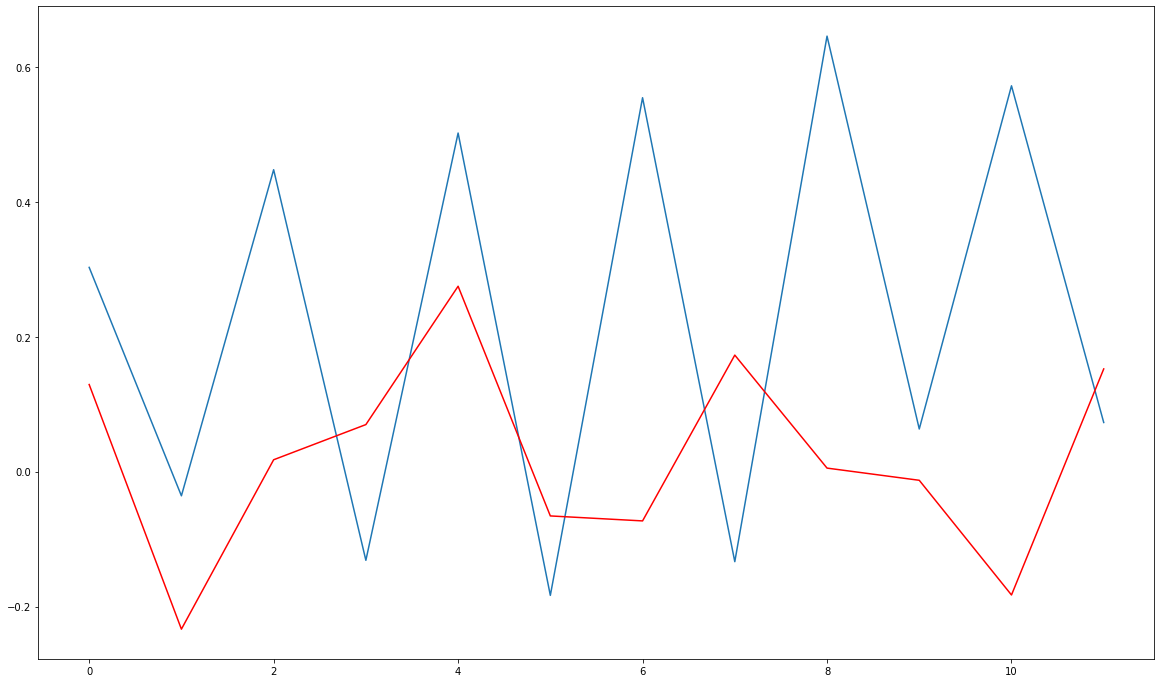

RMSE of different interval for ARIMA model is :  0.4726079389052629
RSquared of different interval for ARIMA model is :  0.6807898177121444
NSE of different interval for ARIMA model is :  -0.9877220411386567


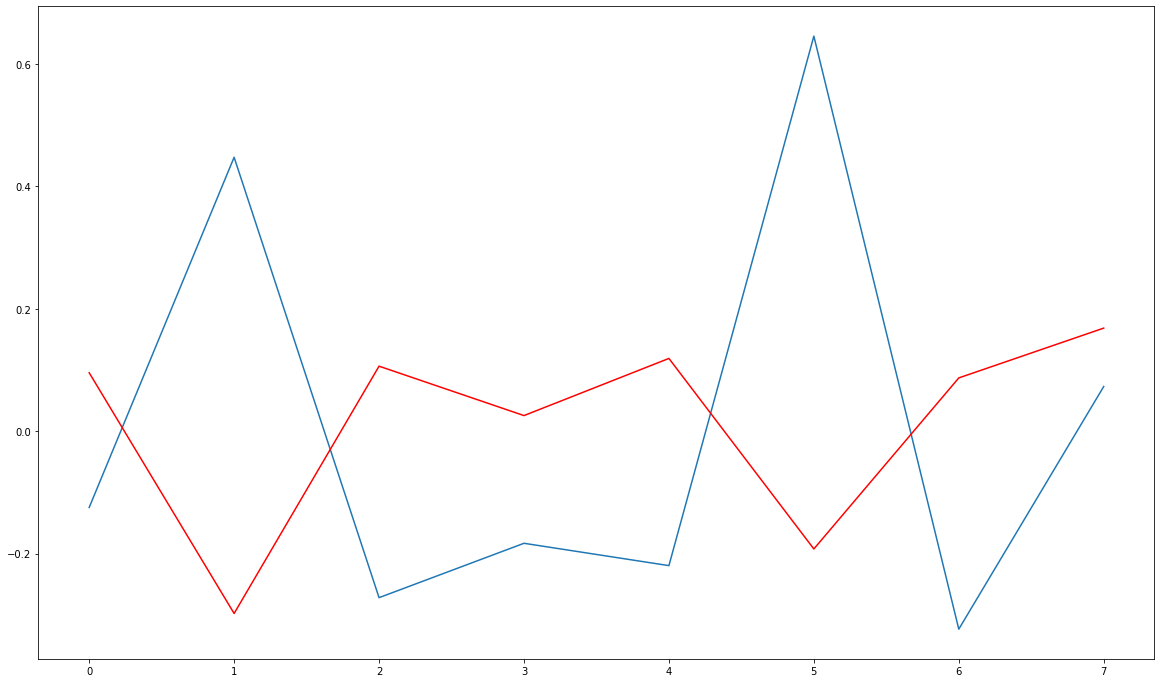

RMSE of different interval for ARIMA model is :  0.2784650539983727
RSquared of different interval for ARIMA model is :  0.014320406208177391
NSE of different interval for ARIMA model is :  -6.86697458416588


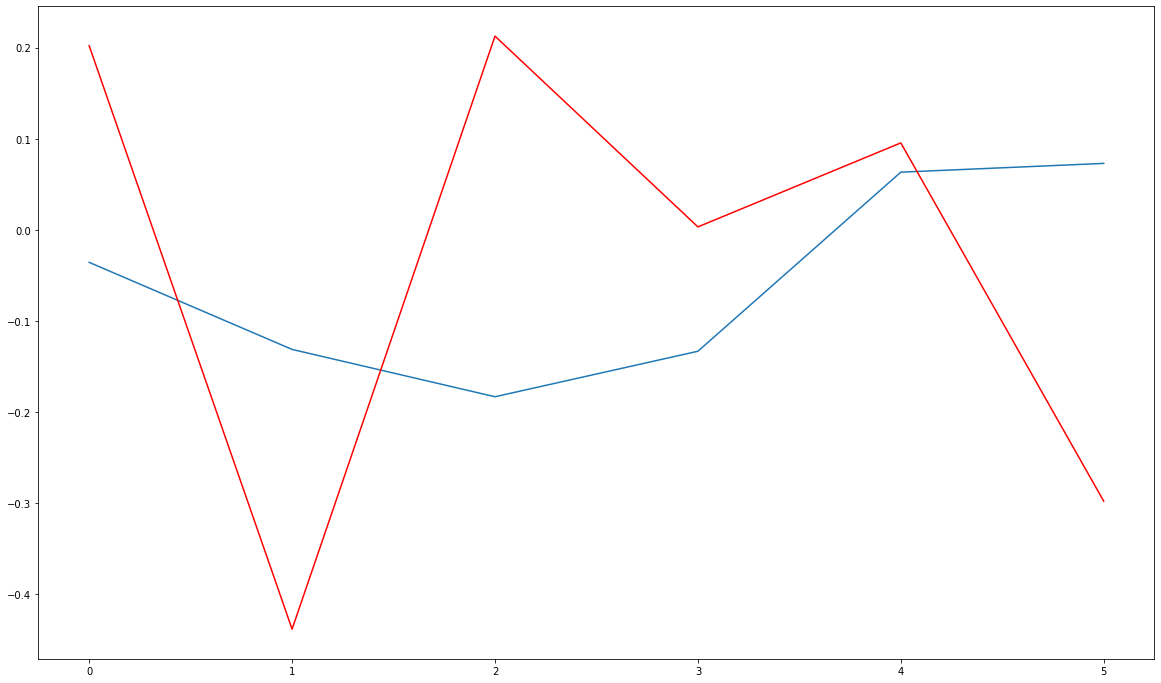

In [32]:
data1 = df['new_diff'].dropna().to_numpy()
ds1 = [data1[0::1],data1[0::2],data1[0::3],data1[0::4]]
for i in ds1:
  n = int(len(i)*0.7)
  train, test = i[:n], i[n:]
  # fit model
  model = ARIMA(data, order=(3, 1, 3))
  model_fit = model.fit()

# make prediction
  yhat = model_fit.predict(len(train), len(train)+len(test)-1)
  rmse = sqrt(mean_squared_error(test, yhat))
  r_squared = rsquared(test,yhat)
  n_s_e = NSE(test,yhat)
  print("RMSE of different interval for ARIMA model is : ",rmse)
  print("RSquared of different interval for ARIMA model is : ",r_squared)
  print("NSE of different interval for ARIMA model is : ",n_s_e)
  plt.figure(figsize=(20,12))
  plt.plot(test)
  plt.plot(yhat, color='red')
  plt.show()

In [33]:
data = df['log_diff'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]

# fit model
model = ARIMA(data, order=(3, 1, 3))
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
r_squared = rsquared(test,yhat)
n_s_e = NSE(test,yhat)

print("RMSE for ARIMA model is : ",rmse)
print("RSquared for ARIMA model is : ",r_squared)
print("NSE for ARIMA model is : ",n_s_e)

RMSE for ARIMA model is :  0.06520227153590566
RSquared for ARIMA model is :  0.9296033855336473
NSE for ARIMA model is :  0.9183092401025715


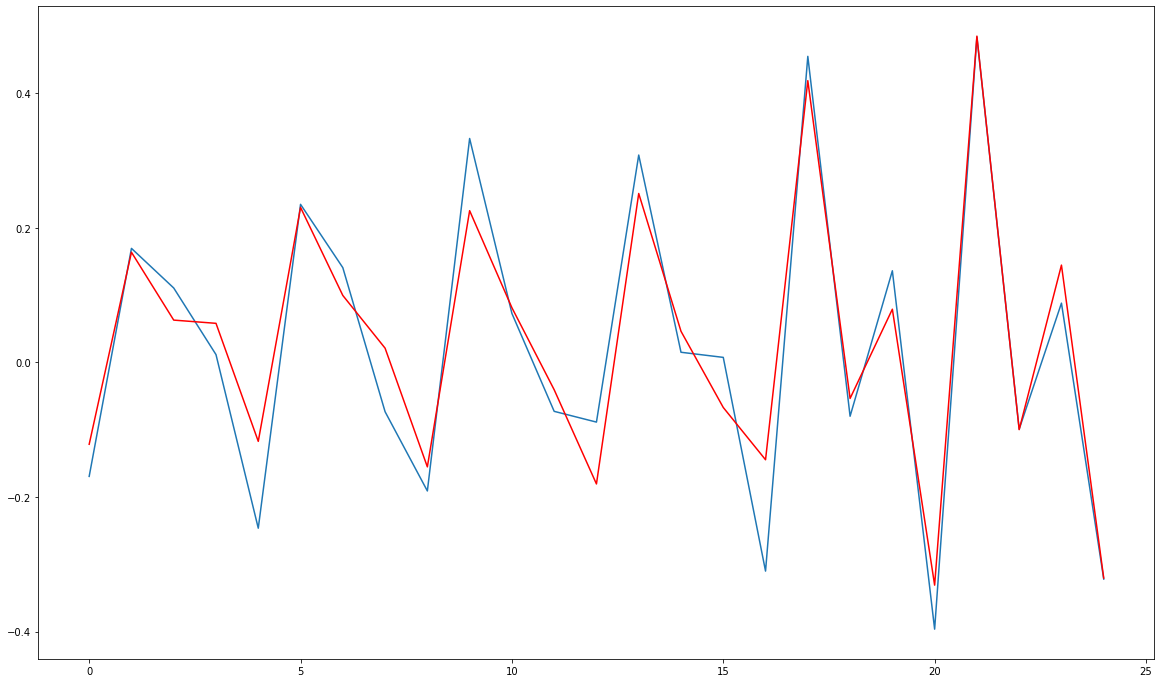

In [34]:
# plot results
plt.figure(figsize=(20,12))
plt.plot(test)
plt.plot(yhat, color='red')
plt.show()

# SARIMA model

RMSE of different interval for SARIMA model is :  10.675727903772614
RSquared of different interval for SARIMA model is :  0.09742975163925288
NSE of different interval for SARIMA model is :  -11.250041965062628


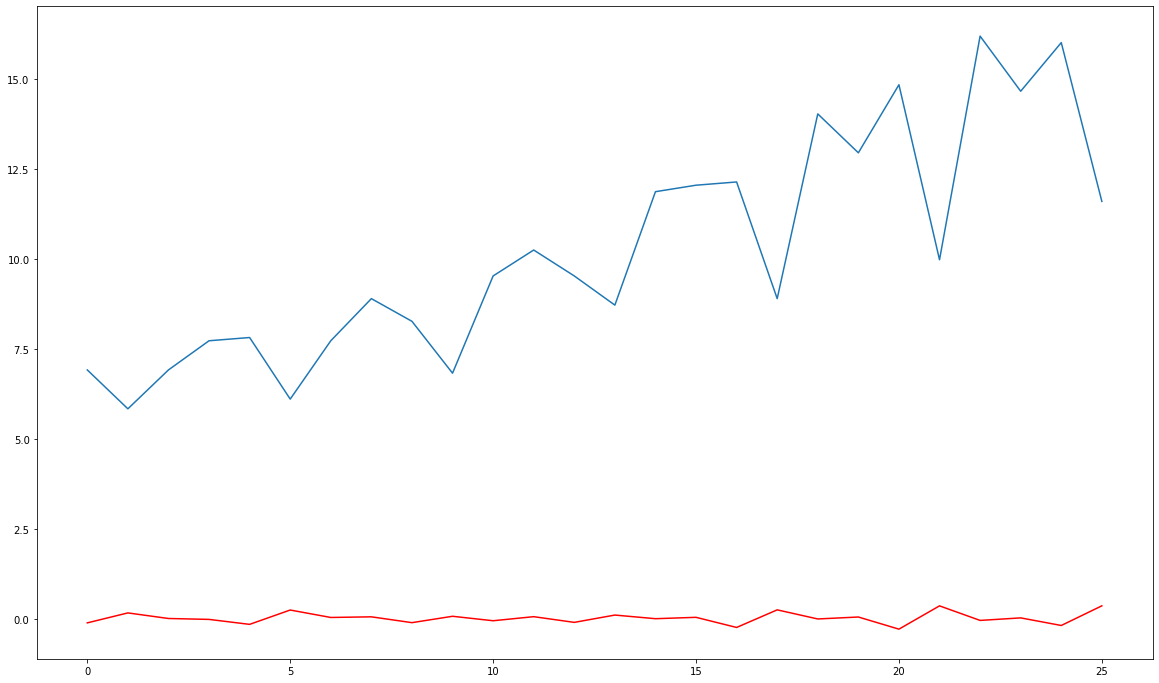

RMSE of different interval for SARIMA model is :  11.38068016703544
RSquared of different interval for SARIMA model is :  0.009223522183797267
NSE of different interval for SARIMA model is :  -10.710558080692993


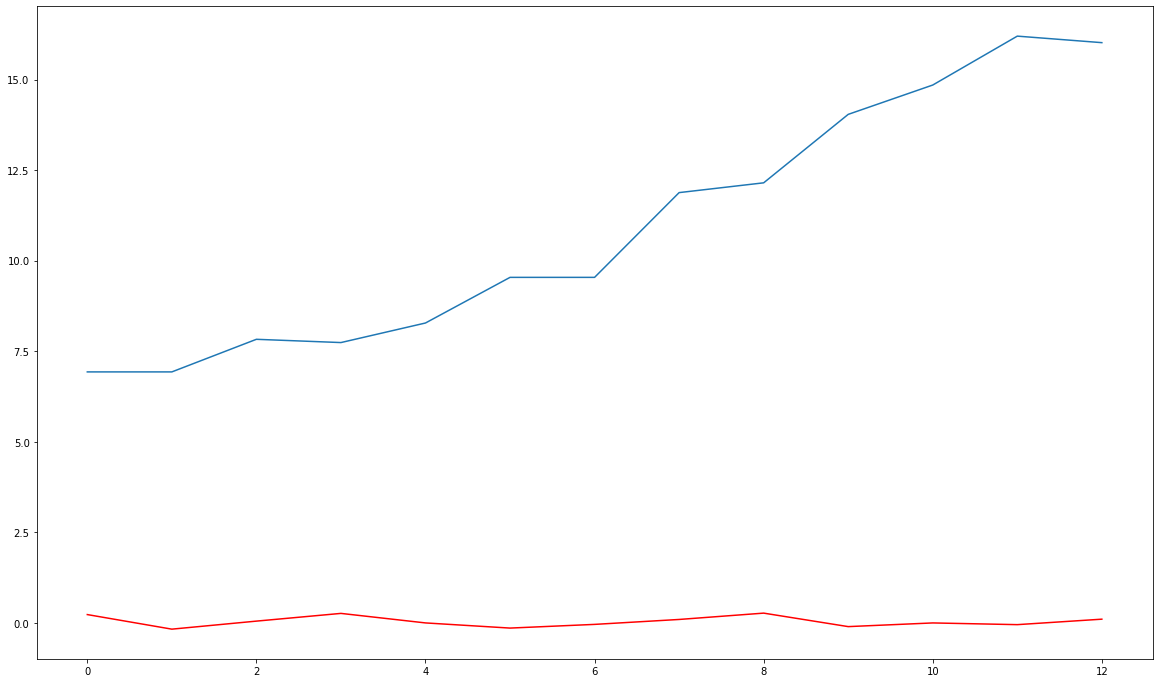

RMSE of different interval for SARIMA model is :  10.221889826703329
RSquared of different interval for SARIMA model is :  0.030926845738348967
NSE of different interval for SARIMA model is :  -9.417866278741027


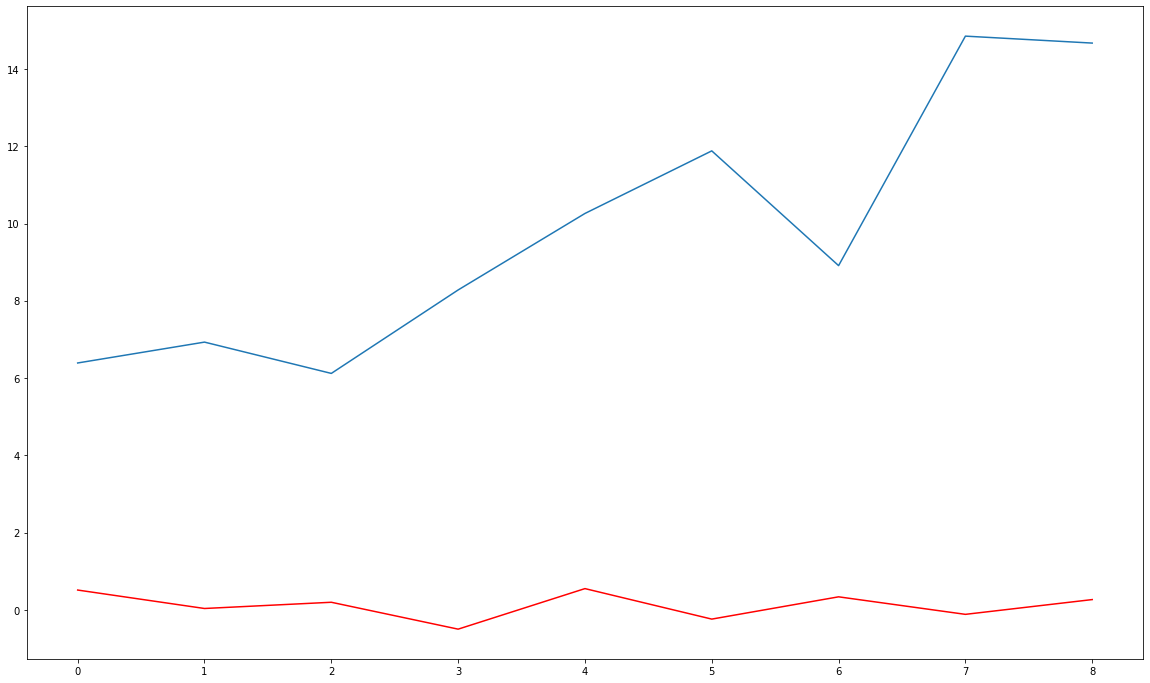

RMSE of different interval for SARIMA model is :  10.891584383428873
RSquared of different interval for SARIMA model is :  0.01820370425954469
NSE of different interval for SARIMA model is :  -8.435634766146071


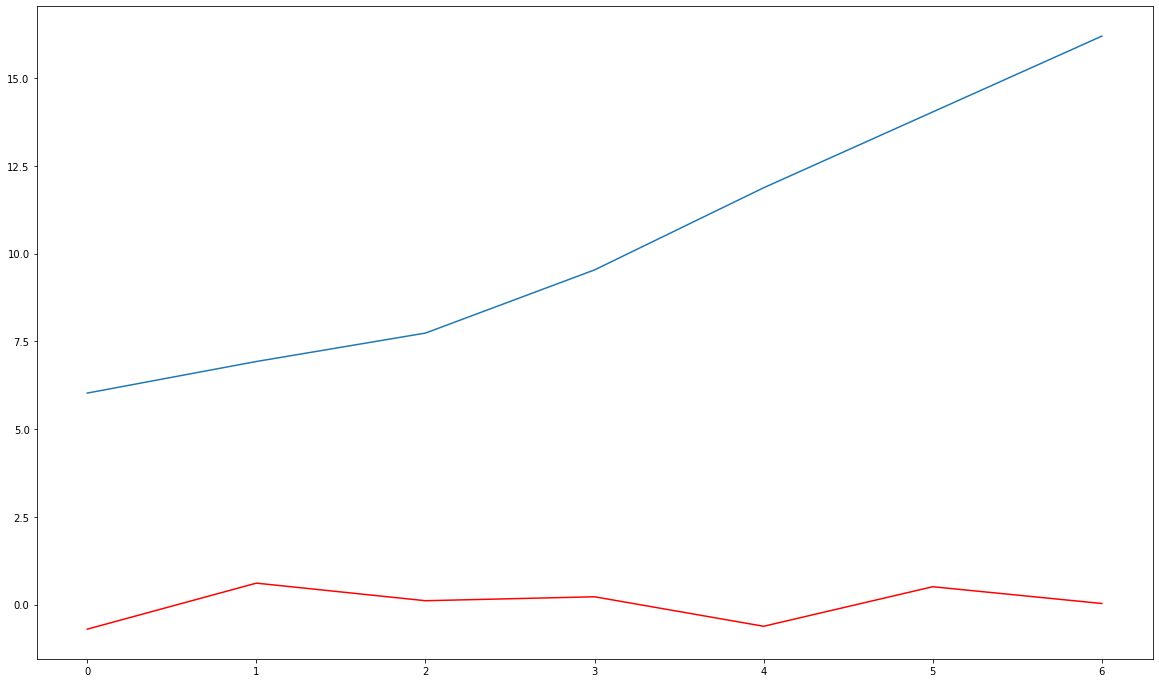

In [35]:
data1 = df['data'].dropna().to_numpy()
ds1 = [data1[0::1],data1[0::2],data1[0::3],data1[0::4]]
for i in ds1:
  n = int(len(i)*0.7)
  train, test = i[:n], i[n:]
  # fit model
  mod = sm.tsa.statespace.SARIMAX(data,order=(1, 1, 1),seasonal_order=(1, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
  model_fit = mod.fit()

# make prediction
  yhat = model_fit.predict(len(train), len(train)+len(test)-1)
  rmse = sqrt(mean_squared_error(test, yhat))
  r_squared = rsquared(test,yhat)
  n_s_e = NSE(test,yhat)
  print("RMSE of different interval for SARIMA model is : ",rmse)
  print("RSquared of different interval for SARIMA model is : ",r_squared)
  print("NSE of different interval for SARIMA model is : ",n_s_e)
  plt.figure(figsize=(20,12))
  plt.plot(test)
  plt.plot(yhat, color='red')
  plt.show()

In [36]:
data = df['data'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]

mod = sm.tsa.statespace.SARIMAX(data,order=(1, 1, 1),seasonal_order=(1, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
model_fit = mod.fit()
print(model_fit.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6809      0.116     -5.861      0.000      -0.909      -0.453
ma.L1         -0.3954      0.161     -2.462      0.014      -0.710      -0.081
ar.S.L12       0.9714      0.481      2.018      0.044       0.028       1.915
ma.S.L12      -0.4771      0.526     -0.907      0.365      -1.508       0.554
sigma2         0.5784      0.157      3.691      0.000       0.271       0.886


In [37]:
# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
r_squared = rsquared(test,yhat)
n_s_e = NSE(test,yhat)

print("RMSE for SARIMA model is : ",rmse)
print("RSquared for SARIMA model is : ",r_squared)
print("NSE for SARIMA model is : ",n_s_e)

RMSE for SARIMA model is :  1.0167867012773284
RSquared for SARIMA model is :  0.8916790113386717
NSE for SARIMA model is :  0.8888774244452069


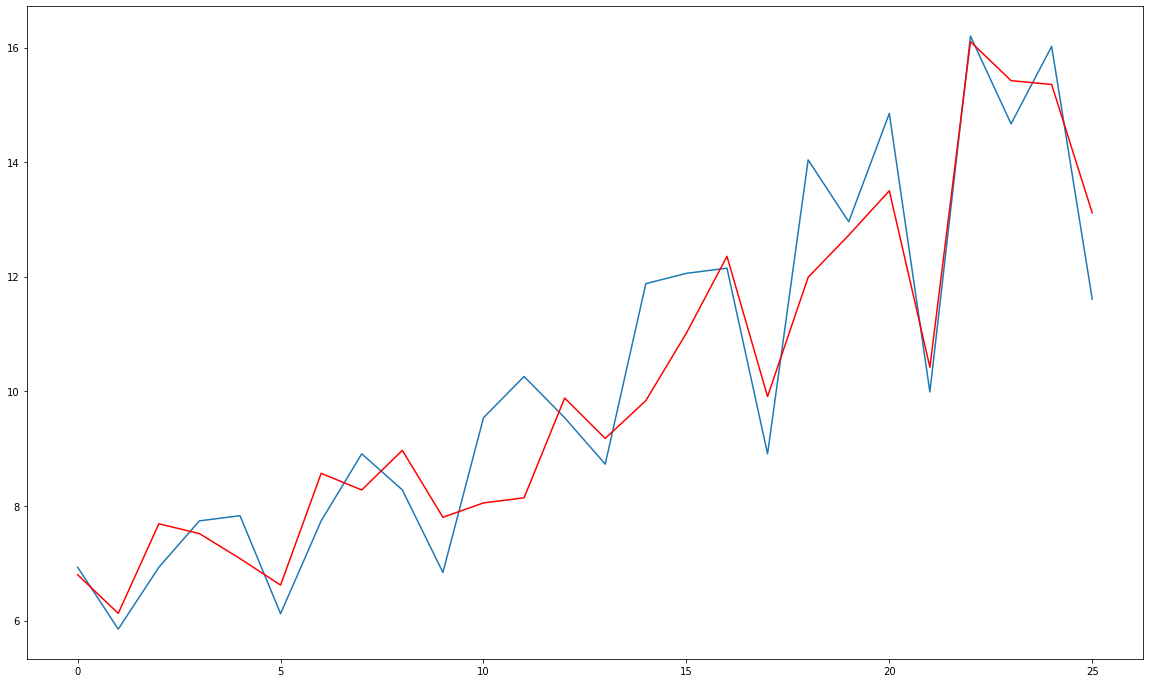

In [38]:
plt.figure(figsize=(20,12))
plt.plot(test)
plt.plot(yhat, color='red')
plt.show()

Based on RMSE value of different model such as AR, MA, ARMA, ARIMA, SARIMA, the model which is giving low RMSE value is ARMA(3,0,3) model and So best predictive result.